In [754]:
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
import time
from IPython.display import clear_output

In [783]:
#Functions that will be very useful for creating/updating mazes

'''
Define the grid to be working with

            **inputs**

-dim = dimension size of the grid 
-p = probability that a grid spot will be filled or open
'''

def grid(dim, p):
    #start with a dim by dim zero array
    a = np.zeros((dim,dim))
    for item in range(dim):
        for thing in range(dim):
            #makes sure the top left spot is empty
            if item == 0 and thing == 0:
                pass
            #makes sure the bottom right spot is empty
            elif item == dim - 1 and thing == dim - 1:
                pass
            #change the cells based off of the value of p and our random number
            else:
                x = random.random()
                #if our random number is less than p, then the cell will not be filled
                if p < x:
                    a[item][thing] = 0
                #if our random number is greater than p, then the cell will  be filled
                else:
                    a[item][thing] = 1
    return a


'''
update the state of the maze after moving to the next tile

            **inputs**

-maze = the maze to be updated
-i = which row to update
-j = which column to update
'''

def update(maze, i, j):
    #shades the tile grey to distinguish between open and occupied
    maze[i][j] = 0.5
    
    
    
def Euclidean(maze, i, j):
    distance = np.sqrt(pow(len(maze)-1 - i, 2) + pow(len(maze[0])-1 - j, 2))
    return distance



def Manhattan(maze, i, j):
    distance = abs(len(maze)-1 - i) + abs(len(maze[0])-1 - j)
    return distance


In [679]:
#BFS Search Algorithm

def BFS(maze):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    
    #initialize the fringe and store the starting point of the maze
    fringe = queue.Queue()
    fringe.put([i, j])
    
    #plot the initial maze
    plt.imshow(maze, cmap=plt.cm.binary)
    plt.pause(0.05)
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        
        #Is the maze unsolvable?
        if queue.Queue.qsize(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            print("UNSOLVABLE")
            break
            
        #gets the current node and update i and j
        current = fringe.get()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            print("SOLVED")
            
            update(maze_final, i, j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            update(maze_final, 0, 0)
            plt.imshow(maze_final, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            break
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringe.queue:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringe.put([i + 1, j])

        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringe.queue:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringe.put([i, j + 1])
        
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringe.queue:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringe.put([i - 1, j])
        
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringe.queue:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringe.put([i, j - 1])
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
    
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
        
    plt.show()

In [721]:
#test the algorithm
#BFS(grid(5,0.2))

In [732]:
#DFS Search Algorithm

def DFS(maze):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append([i, j])
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.show()
            print("UNSOLVABLE")
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            print("SOLVED")
            
            update(maze_final, i, j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            update(maze_final, 0, 0)
            plt.imshow(maze_final, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            break
            
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringe:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringe.append([i, j - 1])
                    
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringe:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringe.append([i - 1, j])
                    
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringe:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringe.append([i, j + 1])
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringe:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringe.append([i + 1, j])        
        
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
        
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)

    plt.show()

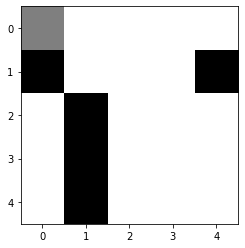

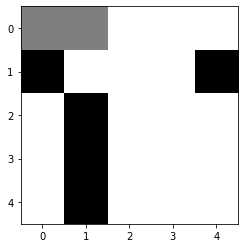

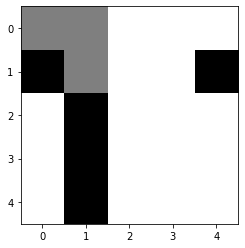

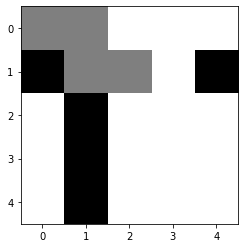

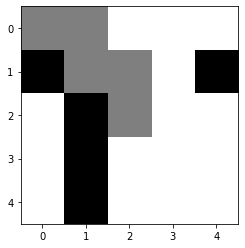

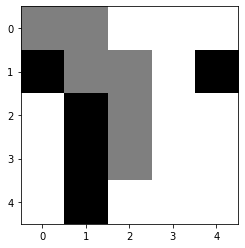

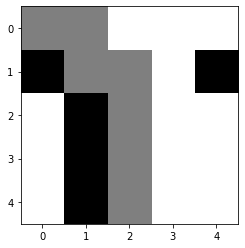

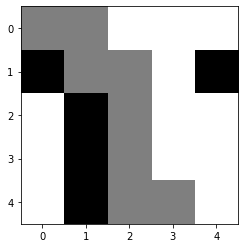

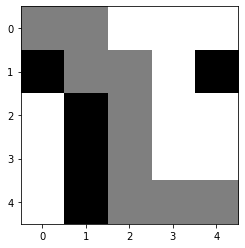

SOLVED


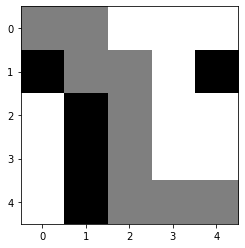

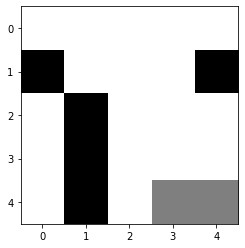

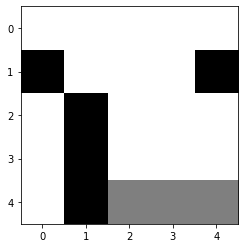

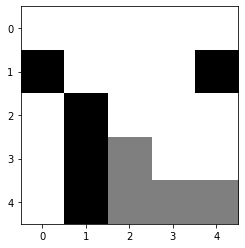

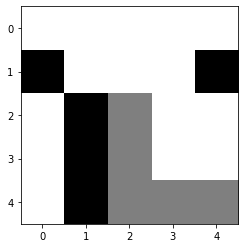

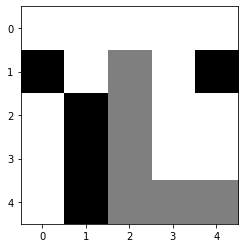

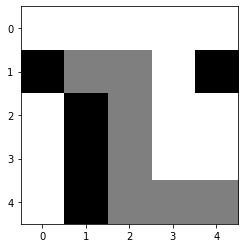

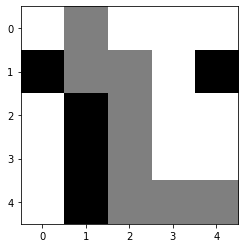

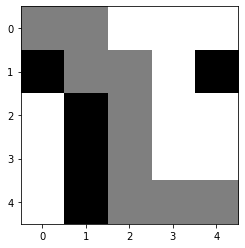

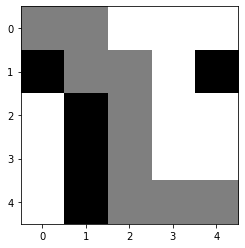

In [762]:
DFS(grid(5,0.3))

In [848]:
#A* Euclidean Distance

def AstarE(maze):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    counter = 0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append([i, j, counter + Euclidean(maze, i, j)])
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.show()
            print("UNSOLVABLE")
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            print("SOLVED")
            
            update(maze_final, i, j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            update(maze_final, 0, 0)
            plt.imshow(maze_final, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            break
       
    
    
    
    
    
    
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if [i, j - 1, counter + Euclidean(maze, i, j - 1)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1)] = (i, j)
                        fringe.append((i, j - 1, counter + Euclidean(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                    prev[(i, j - 1)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Euclidean(maze, i, j - 1)))
                                prev[(i, j - 1)] = (i, j)
                                break
                                
                                
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if [i - 1, j, counter + Euclidean(maze, i - 1, j)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j)] = (i, j)
                        fringe.append((i - 1, j, counter + Euclidean(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                    prev[(i - 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Euclidean(maze, i - 1, j)))
                                prev[(i - 1, j)] = (i, j)
                                break
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if [i, j + 1, counter + Euclidean(maze, i, j + 1)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1)] = (i, j)
                        fringe.append((i, j + 1, counter + Euclidean(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                    prev[(i, j + 1)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Euclidean(maze, i, j + 1)))
                                prev[(i, j + 1)] = (i, j)
                                break
        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if [i + 1, j, counter + Euclidean(maze, i + 1, j)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j)] = (i, j)
                        fringe.append((i + 1, j, counter + Euclidean(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Euclidean(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(x, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                    prev[(i + 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Euclidean(maze, i + 1, j)))
                                prev[(i + 1, j)] = (i, j)
                                break        
        
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
        
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)

    plt.show()

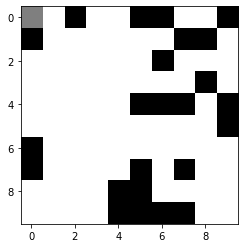

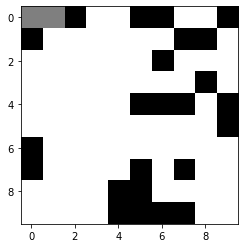

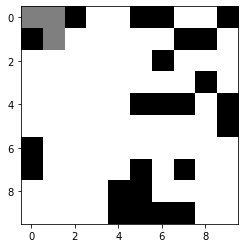

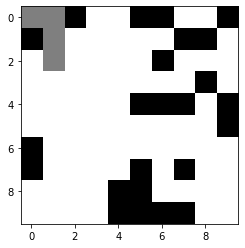

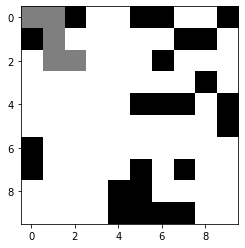

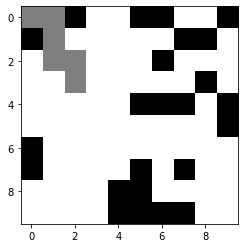

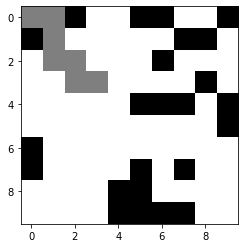

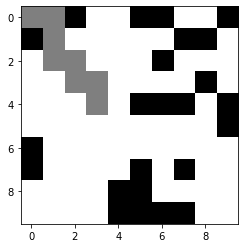

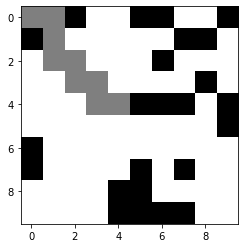

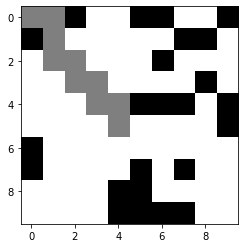

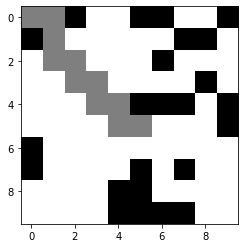

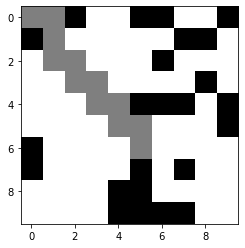

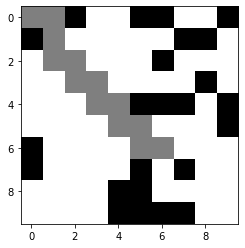

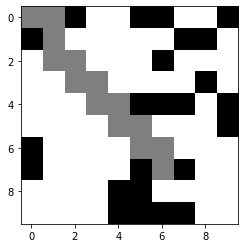

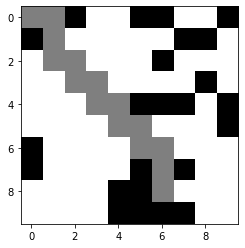

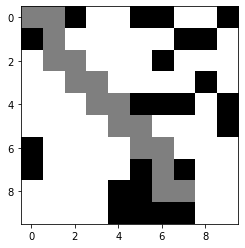

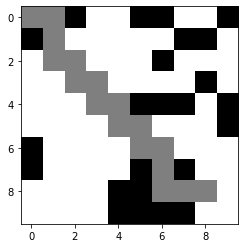

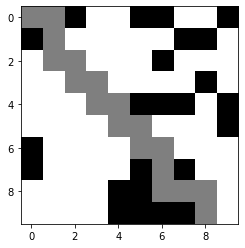

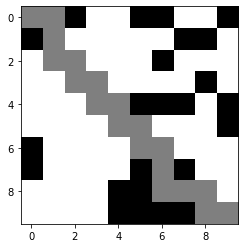

SOLVED


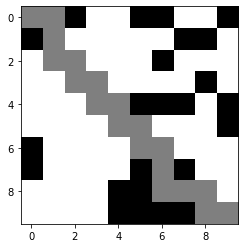

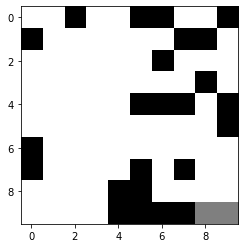

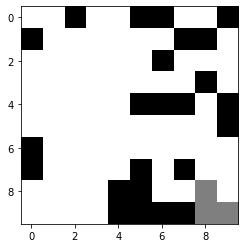

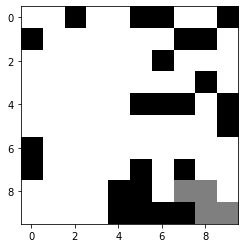

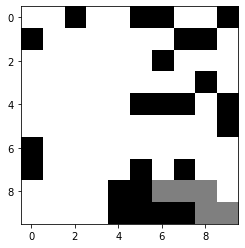

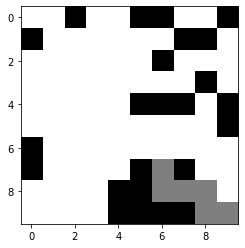

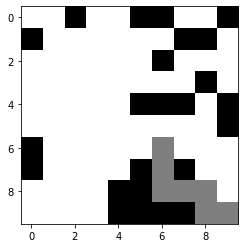

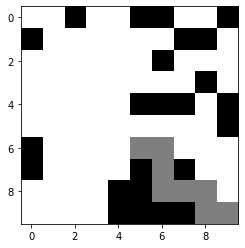

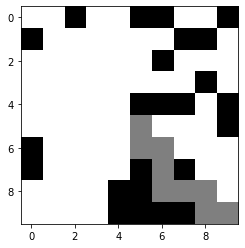

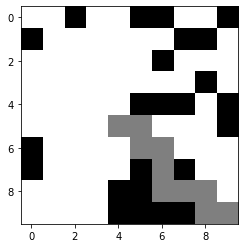

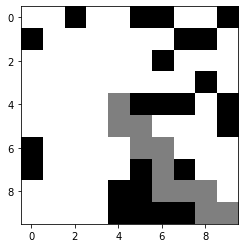

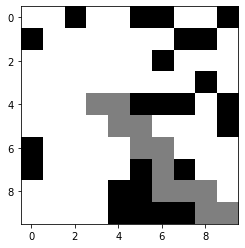

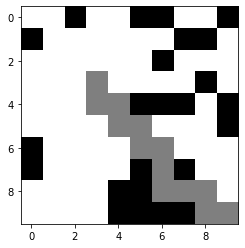

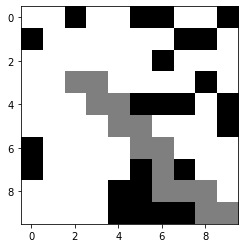

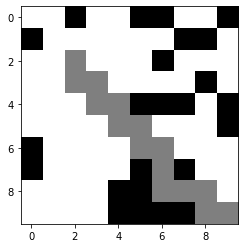

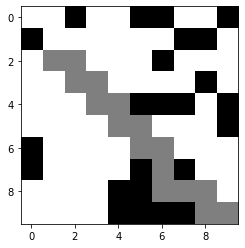

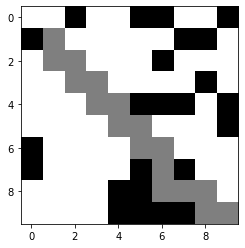

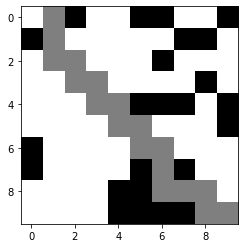

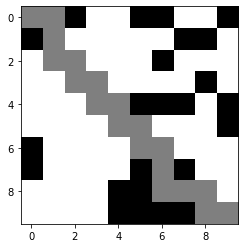

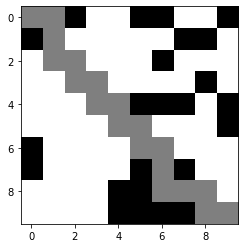

In [849]:
AstarE(grid(10,0.3))

In [840]:
#A* Manhattan Distance

def AstarM(maze):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    maze_final = np.copy(maze)
    solved = False
    i, j = 0, 0
    prev = {}
    counter = 0
    
    #initialize the fringe and store the starting point of the maze
    fringe = []
    fringe.append([i, j, counter + Manhattan(maze, i, j)])
    
    
    #runs until we reach the end
    while solved == False:
        '''
        #*****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            print(q_item)
        '''
        
        #Is the maze unsolvable?
        if len(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.show()
            print("UNSOLVABLE")
            break
            
        #gets the current node and update i and j
        current = fringe.pop()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            print("SOLVED")
            
            update(maze_final, i, j)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            while i != 0 or j!= 0:
                x = prev[i,j]
                i, j = x[0], x[1]
                update(maze_final, i, j)
                plt.imshow(maze_final, cmap=plt.cm.binary)
                plt.pause(0.05)
            
            update(maze_final, 0, 0)
            plt.imshow(maze_final, cmap=plt.cm.binary)
            plt.pause(0.05)
            
            break
       
    
    
    
    
    
    
        #check left solution
        
        #are we outside?
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                #If so, move on
                pass
            else:
                #check if already in fringe
                if [i, j - 1, counter + Manhattan(maze, i, j - 1)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j - 1)] = (i, j)
                        fringe.append((i, j - 1, counter + Manhattan(maze, i, j - 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j - 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                    prev[(i, j - 1)] = (i, j)
                                else:
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j - 1, counter + Manhattan(maze, i, j - 1)))
                                prev[(i, j - 1)] = (i, j)
                                break
                                
                                
        #check up solution
        
        #are we outside?
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if [i - 1, j, counter + Manhattan(maze, i - 1, j)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i - 1, j)] = (i, j)
                        fringe.append((i - 1, j, counter + Manhattan(maze, i - 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i - 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                    prev[(i - 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i - 1, j, counter + Manhattan(maze, i - 1, j)))
                                prev[(i - 1, j)] = (i, j)
                                break
        #check right position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #check if already in fringe
                if [i, j + 1, counter + Manhattan(maze, i, j + 1)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i, j + 1)] = (i, j)
                        fringe.append((i, j + 1, counter + Manhattan(maze, i, j + 1)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i, j + 1) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                    prev[(i, j + 1)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i, j + 1, counter + Manhattan(maze, i, j + 1)))
                                prev[(i, j + 1)] = (i, j)
                                break
                                

        
        #check down position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #check if already in fringe
                if [i + 1, j, counter + Manhattan(maze, i + 1, j)] in fringe:
                    pass
                else:
                    #if the fringe was empty (i.e. the first move), just add the first child to fringe
                    if len(fringe) == 0: 
                        prev[(i + 1, j)] = (i, j)
                        fringe.append((i + 1, j, counter + Manhattan(maze, i + 1, j)))
                    #if the fringe is not empty, check the f(n) value and compare with items in fringe
                    else:
                        for x in range(len(fringe)-1,-1,-1): 
                            if counter + Manhattan(maze, i + 1, j) > fringe[x][2]:
                                if x == 0:
                                    fringe.insert(0, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                    prev[(i + 1, j)] = (i, j)
                                else: 
                                    pass
                            else: 
                                fringe.insert(x + 1, (i + 1, j, counter + Manhattan(maze, i + 1, j)))
                                prev[(i + 1, j)] = (i, j)
                                break        
        
        
        
        #after done checking, update the maze and start over
        update(maze, i, j)
        
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
        
    plt.show()
    

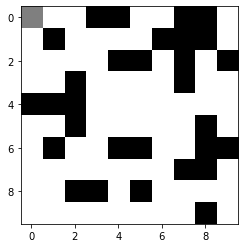

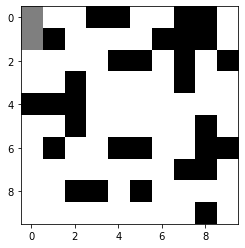

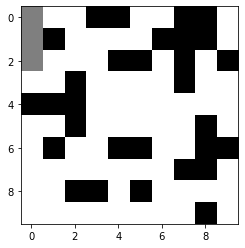

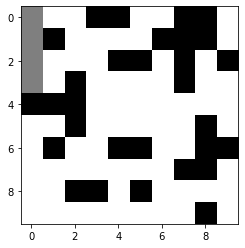

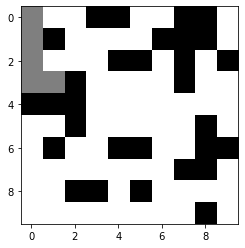

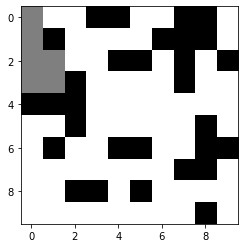

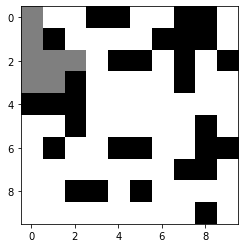

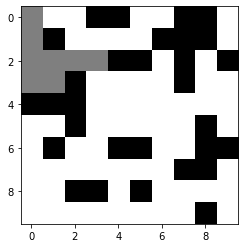

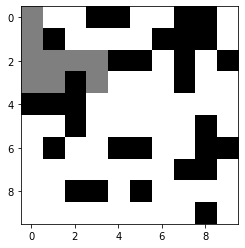

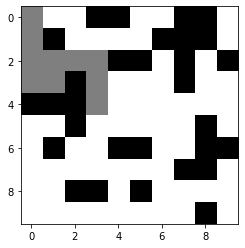

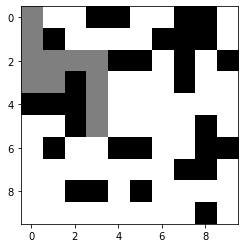

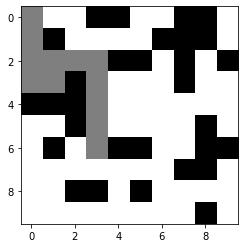

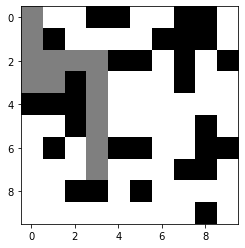

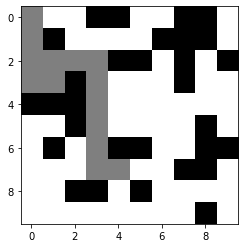

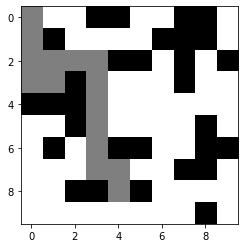

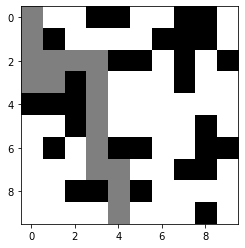

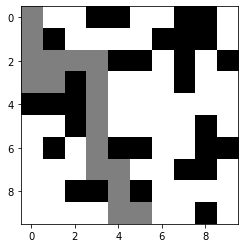

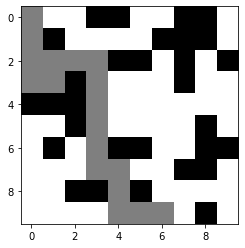

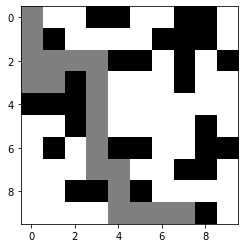

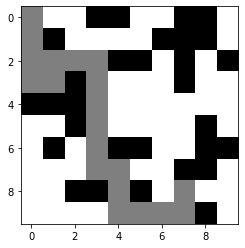

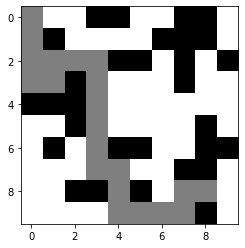

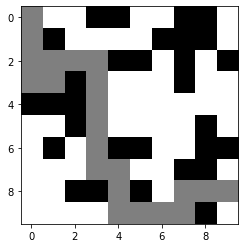

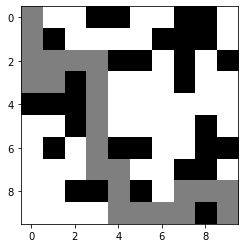

SOLVED


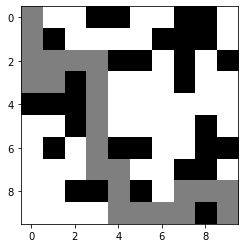

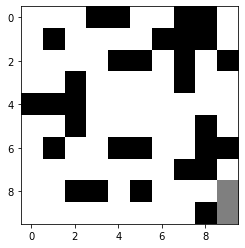

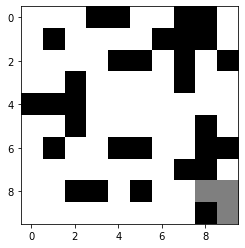

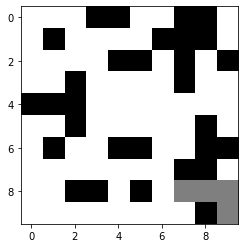

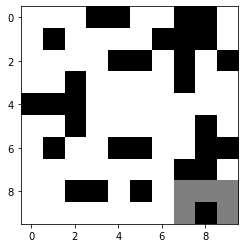

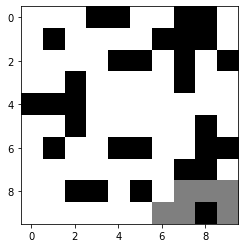

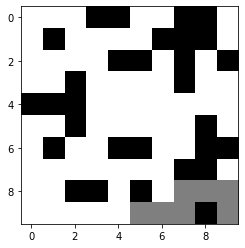

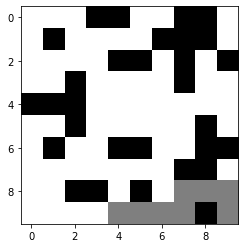

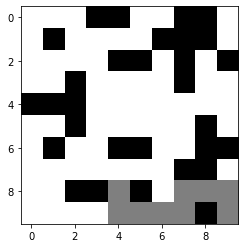

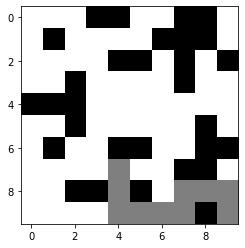

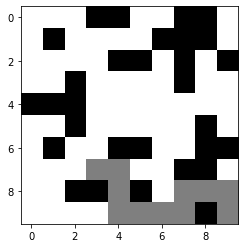

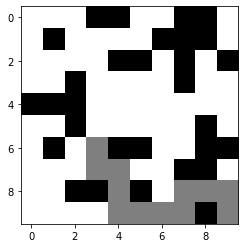

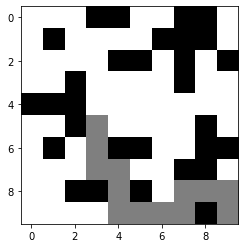

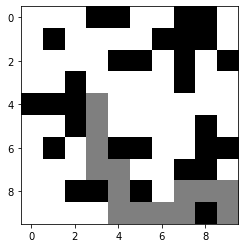

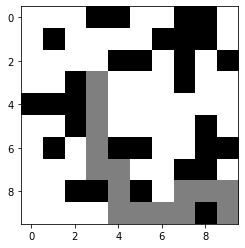

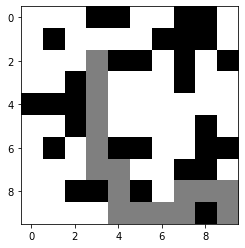

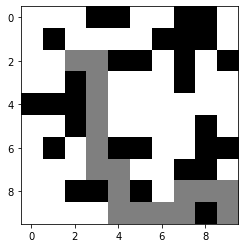

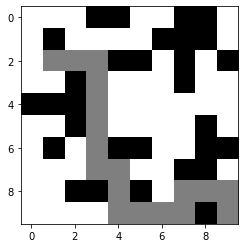

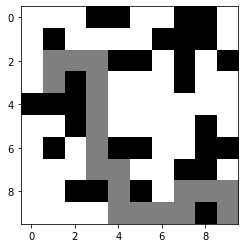

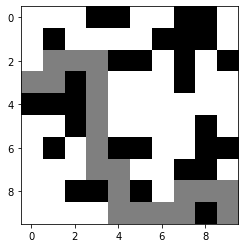

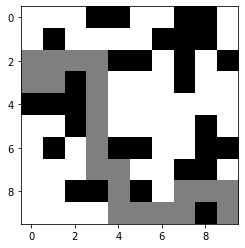

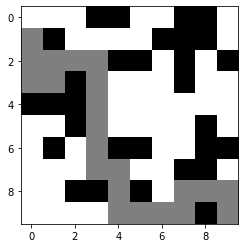

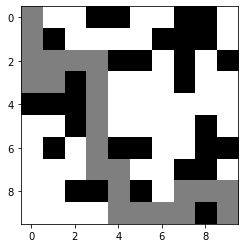

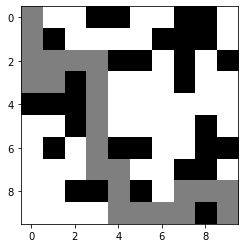

In [845]:
AstarM(grid(10,0.3))

In [718]:
#Bi-Directional BFS

def BiBFS(maze):
#initialized state is set to false
#i,j-->row,column from start m,n-->row,column from end
    maze_final=np.copy(maze)
    solved=False
    i,j=0,0
    m,n=len(maze)-1,len(maze[0])-1
    prev={}
    prev2={}
    
#initialize fringe for starting point and fringe from ending point
    fringeStart=queue.Queue()
    fringeStart.put([i,j])
    fringeEnd=queue.Queue()
    fringeEnd.put([m,n])
    
    #run loop until start and end meet or no solution
    while solved==False:
        #if maze is still unsolved and there are no more children left in fringe, maze is unsolvable
        if (queue.Queue.qsize(fringeStart)==0 or queue.Queue.qsize(fringeEnd)==0):
            #update state of maze, display result, then break loop
            update(maze,i,j)
            update(maze,m,n)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            print("UNSOLVABLE")
            break
            
        #gets current node and updates i,j and m,n
        currentStart=fringeStart.get()
        currentEnd=fringeEnd.get()
        i,j=currentStart[0],currentStart[1]
        m,n=currentEnd[0],currentEnd[1]
        
        #check if start and end meet in middle,display result, then break loop
        if (i+1,j) in prev2:
            m, n = i+1, j
            solved = True
            
        if (i,j+1) in prev2:
            m, n = i, j+1
            solved = True
            
        if (i-1,j) in prev2:
            m, n = i-1, j
            solved = True
            
        if (i,j-1) in prev2:
            m,n = i, j-1
            solved = True
        
        if solved == True:
            update(maze,i,j)
            update(maze,m,n)
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.pause(0.05)
            print("SOLVED")

            update(maze_final,i,j)
            update(maze_final,m,n)
            plt.imshow(maze_final, cmap=plt.cm.binary)
            plt.pause(0.05)

            while True:
                if i==0 and j==0 and m==len(maze)-1 and n==len(maze[0])-1:
                    break
                    
                print("i =",i)
                print("j =",j)
                print("m =",m)
                print("n =",n)
                if (i,j) == (0,0):
                    y=prev2[(m,n)]
                    m,n=y[0],y[1]
                    update(maze_final,m,n)
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                elif (m,n) == (len(maze)-1, len(maze[0])-1):
                    x=prev[(i,j)]
                    i,j=x[0],x[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)
                    
                else:
                    x=prev[(i,j)]
                    y=prev2[(m,n)]
                    i,j=x[0],x[1]
                    m,n=y[0],y[1]
                    update(maze_final,i,j)
                    update(maze_final,m,n)
                    plt.imshow(maze_final, cmap=plt.cm.binary)
                    plt.pause(0.05)

            update(maze_final,0,0)
            update(maze_final,len(maze)-1,len(maze[0])-1)
            plt.imshow(maze_final, cmap=plt.cm.binary)
            plt.pause(0.05)

            break
            
        #check down position of i,j
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i + 1, j)] = (i, j)
                    fringeStart.put([i + 1, j])
                    
        #check up position of m,n
        if m - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m - 1][n] == 1 or maze[m - 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m - 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m - 1, n)] = (m, n)
                    fringeEnd.put([m - 1, n])
                    
        #check right position of i,j
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or iously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j + 1)] = (i, j)
                    fringeStart.put([i, j + 1])
                    
        #check left position of m,n
        if n - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n - 1] == 1 or maze[m][n - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n - 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n - 1)] = (m, n)
                    fringeEnd.put([m, n - 1])
                    
        #check up position of i,j
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringeStart.queue:
                    pass
                else:
                    prev[(i - 1, j)] = (i, j)
                    fringeStart.put([i - 1, j])
                    
        #check down position of m,n
        if m + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m + 1][n] == 1 or maze[m + 1][n] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m + 1, n] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m + 1, n)] = (m, n)
                    fringeEnd.put([m + 1, n])
                    
        #check left position of i,j
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringeStart.queue:
                    pass
                else:
                    prev[(i, j - 1)] = (i, j)
                    fringeStart.put([i, j - 1])
                    
        #check right position of m,n
        if n + 1 >= len(maze[m]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[m][n + 1] == 1 or maze[m][n + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [m, n + 1] in fringeEnd.queue:
                    pass
                else:
                    prev2[(m, n + 1)] = (m, n)
                    fringeEnd.put([m, n + 1])
                    
        #after done checking, update maze and start over
        update(maze, i, j)
        update(maze,m,n)
        plt.imshow(maze, cmap=plt.cm.binary)
        plt.pause(0.05)
    plt.show()

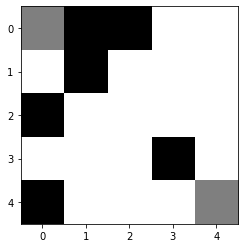

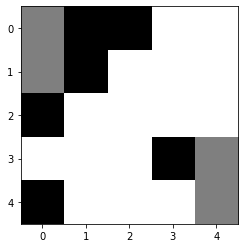

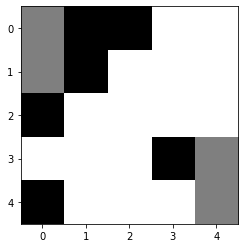

UNSOLVABLE


In [720]:
#test bidirection bfs
BiBFS(grid(5,0.3))

In [731]:
list = [3,1]
print(list)
list.insert(1,2)
print(list)
print(list.pop())
print(list)

[3, 1]
[3, 2, 1]
1
[3, 2]


In [819]:
list = [(1,2,3), (1,2,2), (1,2,0)]
y = (1,2,1)
list.pop()
for x in range(len(list)-1,-1,-1): 
    if y[2] > list[x][2]:
        if x==0:
            list.insert(x,y)
        else: 
            pass
    else: 
        list.insert(x + 1,y)
        break
        
print(list)

if (1, 2, 2.5) in list:
    print("woot")

[(1, 2, 3), (1, 2, 2), (1, 2, 1)]
